# Question 3

##### For each year, fit a logistic regression model for the probability of diverted US flightsusing as many features as possible from attributes of the departure date, the scheduled departure and arrival times, the coordinates and distance between departureand planned arrival airports, and the carrier. Visualize the coefficients across years.

In [1]:
# importing the necassary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

### Importing the cleaned datasets

In [2]:
data_2007 = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\cleaned data files\data_2007.csv")

In [3]:
# plane_data = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\cleaned data files\plane_data.csv")
airport_data = pd.read_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\cleaned data files\airport_data.csv")

In [4]:
# viewing the first few records of the data set
pd.set_option('display.max_columns', None)
data_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,0,0,0,0,0,0


In [5]:
# dependent variable is categorical
data_2007['Diverted'].value_counts()

Diverted
0    7436009
1      17179
Name: count, dtype: int64

## Imputation of the null values

In [6]:
data_2007.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              160748
CRSDepTime                0
ArrTime              177927
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                  22
ActualElapsedTime    177927
CRSElapsedTime          994
AirTime              177927
ArrDelay             177927
DepDelay             160748
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [7]:
columns_with_null_values = data_2007.columns[data_2007.isnull().any()]
columns_with_null_values

Index(['DepTime', 'ArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay'],
      dtype='object')

#### Checking the distributions of the columns with missing values to decide on imputation suitability

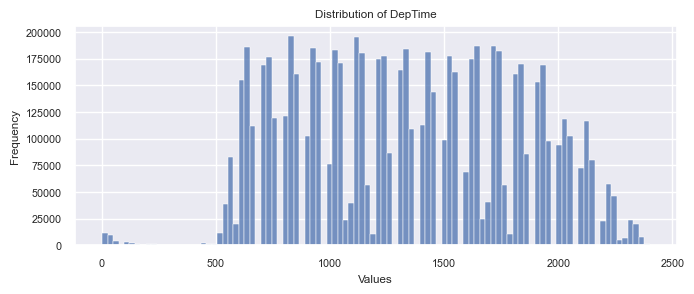

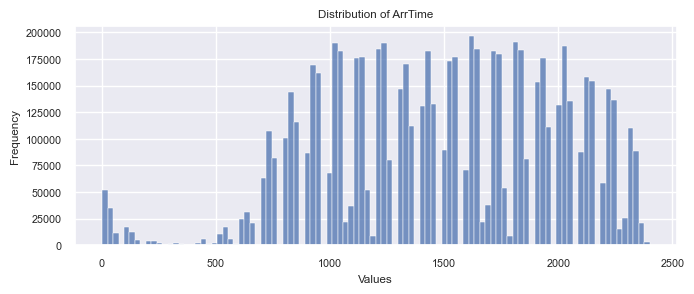

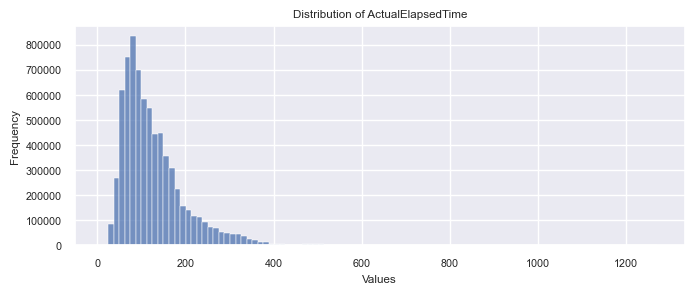

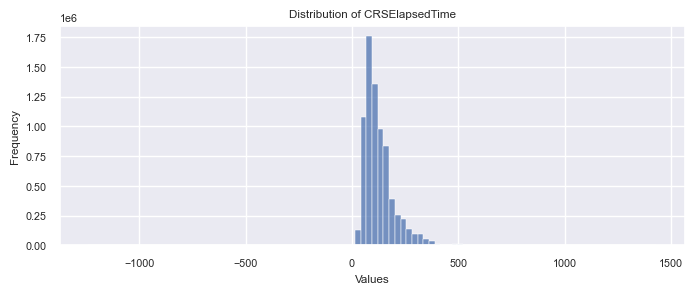

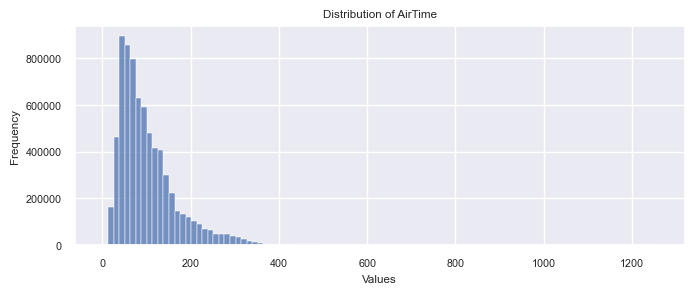

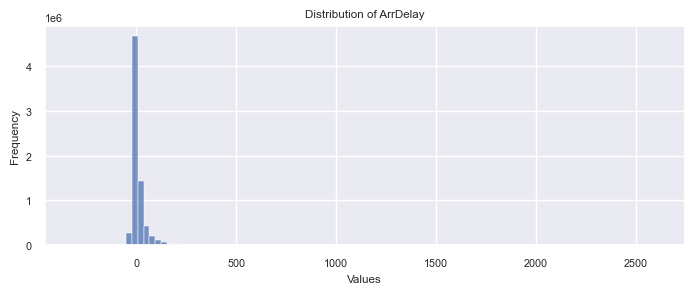

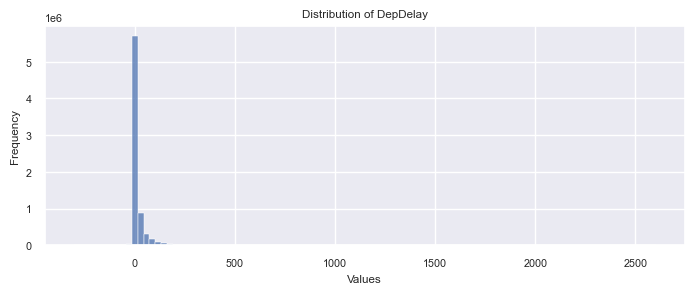

In [8]:
columns = ['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime','AirTime', 'ArrDelay', 'DepDelay']

# Iterating over the columns containing null values to check each variable's distribution
for column in columns:
    # Checking to make sure that the null values were not removed accidently
    if data_2007[column].isnull().any():
        # Histograms for each column with missing values
        plt.figure(figsize = (7,3))
        sns.set(font_scale = 0.7)
        ax = sns.histplot(data=data_2007, x=column, bins=100)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()  
        

the variables resembling uniform distibution will be imputed using the mean and the skewed ones with median
the column 'TailNum' will be ignored as it is a alphanumeric code used for identification 

In [9]:
# data cleaning for missing values through imputation

# uniformly distributed variables
data_2007['DepTime'].fillna(data_2007['DepTime'].mean(), inplace=True)
data_2007['ArrTime'].fillna(data_2007['ArrTime'].mean(), inplace=True)

# skewed distributions
data_2007['ActualElapsedTime'].fillna(data_2007['ActualElapsedTime'].median(), inplace=True)
data_2007['CRSElapsedTime'].fillna(data_2007['CRSElapsedTime'].median(), inplace=True)
data_2007['AirTime'].fillna(data_2007['AirTime'].median(), inplace=True)
data_2007['ArrDelay'].fillna(data_2007['ArrDelay'].median(), inplace=True)
data_2007['DepDelay'].fillna(data_2007['DepDelay'].median(), inplace=True)

In [10]:
# rechecking to confirm if the missing values have been imputed
data_2007.isnull().sum()

Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
DepTime               0
CRSDepTime            0
ArrTime               0
CRSArrTime            0
UniqueCarrier         0
FlightNum             0
TailNum              22
ActualElapsedTime     0
CRSElapsedTime        0
AirTime               0
ArrDelay              0
DepDelay              0
Origin                0
Dest                  0
Distance              0
TaxiIn                0
TaxiOut               0
Cancelled             0
Diverted              0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
dtype: int64

In [11]:
data_2007.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [12]:
filtered_data_2007 = data_2007[['Diverted', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
                              'CRSArrTime', 'DepDelay', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'Cancelled', 
                              'CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay', 'TailNum']]

In [13]:
airport_data.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [13]:
airport_data.columns

Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')

In [15]:
data_2007.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

it was found by observation that the column 'iata' in the airport dataset is similar to the Origin and Dest columns in
the filtered 2007 dataset.
further information about coordinates can be extracted

## Merging the datasets based on appropriate columns

In [14]:
# renaming the column 'Dest' in filtered_data_2007 to 'iata'
filtered_data_2007 = filtered_data_2007.rename(columns = {'Dest':'iata'})
filtered_data_2007.head(0)

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Origin,iata,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum


In [15]:
# combining the airport data set and the filtered_data_2007 set

# using 'iata' and 'Origin' columns to merge to info about destination coordinates
merged_set_v1 = filtered_data_2007.merge(airport_data[['iata', 'lat', 'long']], on = 'iata', how = 'inner') 
merged_set_v1.head()

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Origin,iata,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,lat,long
0,0,1,1,1,1225,1340,7.0,WN,SMF,ONT,389,0,0,0,0,0,0,N351,34.056,-117.601194
1,0,1,2,2,1610,1840,-4.0,WN,BNA,ONT,1751,0,0,0,0,0,0,N255,34.056,-117.601194
2,0,1,2,2,1400,1455,8.0,WN,LAS,ONT,197,0,0,0,0,0,0,N714CB,34.056,-117.601194
3,0,1,2,2,1120,1220,1.0,WN,LAS,ONT,197,0,0,0,0,0,0,N357,34.056,-117.601194
4,0,1,2,2,2030,2120,3.0,WN,LAS,ONT,197,0,0,0,0,0,0,N688SW,34.056,-117.601194


In [17]:
# renaming the columns lat and long to dest lat and long to get the specific coordinates
merged_set_v1 = merged_set_v1.rename(columns = {'lat':'Dest lat'})
merged_set_v1 = merged_set_v1.rename(columns = {'long':'Dest long'})
merged_set_v1.head(0)

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Origin,iata,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long


remerging the datasets using 'iata' column to get the origin coordinates

In [18]:
# Removing the 'iata' column from the merged DataFrame
merged_set_v1.drop('iata', axis=1, inplace=True)
merged_set_v1.head(0)

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Origin,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long


In [19]:
# renaming the column 'Origin' in filtered_data_2007 to 'iata'
merged_set_v1 = merged_set_v1.rename(columns = {'Origin':'iata'})
merged_set_v1.head(0)

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,iata,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long


In [20]:
# combining the airport data set and the merged_set_v1

# remerging with airport data set
airport_columns = ['iata', 'airport', 'lat', 'long', 'country']

merged_set_v2 = merged_set_v1.merge(airport_data[airport_columns], on = 'iata', how = 'inner') 
merged_set_v2.head()

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,iata,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long,airport,lat,long,country
0,0,1,1,1,1225,1340,7.0,WN,SMF,389,0,0,0,0,0,0,N351,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
1,0,1,2,2,1720,1835,16.0,WN,SMF,389,0,0,0,0,0,0,N624SW,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
2,0,1,2,2,605,725,-1.0,WN,SMF,389,0,0,0,0,0,0,N465,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
3,0,1,2,2,1600,1715,0.0,WN,SMF,389,0,0,0,0,0,0,N212,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
4,0,1,2,2,1835,1950,31.0,WN,SMF,389,0,0,0,0,0,23,N476,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA


In [21]:
merged_set_v2['country'].value_counts()

country
USA    7442239
Name: count, dtype: int64

In [22]:
# renaming the columns lat and long to dest lat and long to get the specific coordinates
merged_set_v2 = merged_set_v2.rename(columns = {'lat':'Origin lat'})
merged_set_v2 = merged_set_v2.rename(columns = {'long':'Origin long'})

# Removing the 'iata' column from the merged DataFrame
merged_set_v2.drop('iata', axis=1, inplace=True)

merged_set_v2.head()

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long,airport,Origin lat,Origin long,country
0,0,1,1,1,1225,1340,7.0,WN,389,0,0,0,0,0,0,N351,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
1,0,1,2,2,1720,1835,16.0,WN,389,0,0,0,0,0,0,N624SW,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
2,0,1,2,2,605,725,-1.0,WN,389,0,0,0,0,0,0,N465,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
3,0,1,2,2,1600,1715,0.0,WN,389,0,0,0,0,0,0,N212,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA
4,0,1,2,2,1835,1950,31.0,WN,389,0,0,0,0,0,23,N476,34.056,-117.601194,Sacramento International,38.695422,-121.590767,USA


In [23]:
# merged_set_v2 = merged_set_v2.reset_index(drop=True, inplace=True)
merged_set_v2.shape

(7442239, 22)

In [24]:
# Encoding the Categorical variable, 'UniqueCarrier'
merged_set_v2['UniqueCarrier'].value_counts()

UniqueCarrier
WN    1168871
AA     633857
OO     593238
MQ     538350
UA     490002
US     485447
DL     475889
XE     434773
NW     414526
CO     323151
YV     293550
EV     283828
FL     263159
9E     258135
OH     233560
B6     191450
AS     160185
F9      97733
HA      56175
AQ      46360
Name: count, dtype: int64

## Encoding categorical variables

In [25]:
# Setting the data type to categorical and ENCODING the categorical column using cat codes
merged_set_v2['UniqueCarrier Encoded'] = merged_set_v2['UniqueCarrier'].astype('category').cat.codes

# removing the 'UniqueCarrier' column
merged_set_v3 = merged_set_v2.drop(columns=['UniqueCarrier'], inplace=False)

merged_set_v3

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long,airport,Origin lat,Origin long,country,UniqueCarrier Encoded
0,0,1,1,1,1225,1340,7.0,389,0,0,0,0,0,0,N351,34.056000,-117.601194,Sacramento International,38.695422,-121.590767,USA,17
1,0,1,2,2,1720,1835,16.0,389,0,0,0,0,0,0,N624SW,34.056000,-117.601194,Sacramento International,38.695422,-121.590767,USA,17
2,0,1,2,2,605,725,-1.0,389,0,0,0,0,0,0,N465,34.056000,-117.601194,Sacramento International,38.695422,-121.590767,USA,17
3,0,1,2,2,1600,1715,0.0,389,0,0,0,0,0,0,N212,34.056000,-117.601194,Sacramento International,38.695422,-121.590767,USA,17
4,0,1,2,2,1835,1950,31.0,389,0,0,0,0,0,23,N476,34.056000,-117.601194,Sacramento International,38.695422,-121.590767,USA,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7442234,0,8,27,1,1727,1757,-11.0,41,0,0,0,0,0,0,N644AS,58.354962,-134.576276,Gustavus,58.424381,-135.707381,USA,3
7442235,0,8,28,2,1727,1757,-8.0,41,0,0,0,0,0,0,N615AS,58.354962,-134.576276,Gustavus,58.424381,-135.707381,USA,3
7442236,0,8,29,3,1727,1757,-14.0,41,0,0,0,0,0,0,N607AS,58.354962,-134.576276,Gustavus,58.424381,-135.707381,USA,3
7442237,0,8,30,4,1727,1757,-3.0,41,0,0,0,0,0,0,N647AS,58.354962,-134.576276,Gustavus,58.424381,-135.707381,USA,3


In [26]:
# Setting the data type to categorical and ENCODING the categorical column using cat codes
merged_set_v2['airport Encoded'] = merged_set_v2['airport'].astype('category').cat.codes

# removing the airport column
merged_set_v3 = merged_set_v2.drop(columns=['airport'], inplace=False)

merged_set_v3

,Diverted,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long,Origin lat,Origin long,country,UniqueCarrier Encoded,airport Encoded
0,0,1,1,1,1225,1340,7.0,WN,389,0,0,0,0,0,0,N351,34.056000,-117.601194,38.695422,-121.590767,USA,17,236
1,0,1,2,2,1720,1835,16.0,WN,389,0,0,0,0,0,0,N624SW,34.056000,-117.601194,38.695422,-121.590767,USA,17,236
2,0,1,2,2,605,725,-1.0,WN,389,0,0,0,0,0,0,N465,34.056000,-117.601194,38.695422,-121.590767,USA,17,236
3,0,1,2,2,1600,1715,0.0,WN,389,0,0,0,0,0,0,N212,34.056000,-117.601194,38.695422,-121.590767,USA,17,236
4,0,1,2,2,1835,1950,31.0,WN,389,0,0,0,0,0,23,N476,34.056000,-117.601194,38.695422,-121.590767,USA,17,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7442234,0,8,27,1,1727,1757,-11.0,AS,41,0,0,0,0,0,0,N644AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108
7442235,0,8,28,2,1727,1757,-8.0,AS,41,0,0,0,0,0,0,N615AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108
7442236,0,8,29,3,1727,1757,-14.0,AS,41,0,0,0,0,0,0,N607AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108
7442237,0,8,30,4,1727,1757,-3.0,AS,41,0,0,0,0,0,0,N647AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108


In [27]:
# encoding the date attributes

# Setting the data type to categorical and ENCODING the categorical column using cat codes

merged_set_v3['Month Encoded'] = merged_set_v3['Month'].astype('category').cat.codes
merged_set_v3['DayofMonth Encoded'] = merged_set_v3['DayofMonth'].astype('category').cat.codes
merged_set_v3['DayOfWeek Encoded'] = merged_set_v3['DayOfWeek'].astype('category').cat.codes

merged_set_v4 = merged_set_v3.drop(columns=['Month', 'DayofMonth', 'DayOfWeek'], inplace=False)

merged_set_v4

,Diverted,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TailNum,Dest lat,Dest long,Origin lat,Origin long,country,UniqueCarrier Encoded,airport Encoded,Month Encoded,DayofMonth Encoded,DayOfWeek Encoded
0,0,1225,1340,7.0,WN,389,0,0,0,0,0,0,N351,34.056000,-117.601194,38.695422,-121.590767,USA,17,236,0,0,0
1,0,1720,1835,16.0,WN,389,0,0,0,0,0,0,N624SW,34.056000,-117.601194,38.695422,-121.590767,USA,17,236,0,1,1
2,0,605,725,-1.0,WN,389,0,0,0,0,0,0,N465,34.056000,-117.601194,38.695422,-121.590767,USA,17,236,0,1,1
3,0,1600,1715,0.0,WN,389,0,0,0,0,0,0,N212,34.056000,-117.601194,38.695422,-121.590767,USA,17,236,0,1,1
4,0,1835,1950,31.0,WN,389,0,0,0,0,0,23,N476,34.056000,-117.601194,38.695422,-121.590767,USA,17,236,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7442234,0,1727,1757,-11.0,AS,41,0,0,0,0,0,0,N644AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108,7,26,0
7442235,0,1727,1757,-8.0,AS,41,0,0,0,0,0,0,N615AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108,7,27,1
7442236,0,1727,1757,-14.0,AS,41,0,0,0,0,0,0,N607AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108,7,28,2
7442237,0,1727,1757,-3.0,AS,41,0,0,0,0,0,0,N647AS,58.354962,-134.576276,58.424381,-135.707381,USA,3,108,7,29,3


In [28]:
merged_set_v4['Diverted'] = merged_set_v2['Diverted'].astype('category').cat.codes
merged_set_v4['Cancelled'] = merged_set_v2['Cancelled'].astype('category').cat.codes

In [29]:
# getting the necessary columns for the model

columns_for_model = merged_set_v4[['Diverted', 'CRSDepTime',
       'CRSArrTime', 'Distance', 'Cancelled', 'CarrierDelay', 'DepDelay', 
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Origin lat', 'Origin long', 'Dest lat', 'Dest long', 'UniqueCarrier Encoded', 'airport Encoded', 'Month Encoded', 'DayOfWeek Encoded']]

In [30]:
# saving the file
columns_for_model.to_csv(r"D:\User\University\Year 2\Programming for Data Science\Programming Coursework\Python files\columns_for_model.csv", index=False)

In [31]:
columns_for_model.shape

(7442239, 19)